In [1]:
import pandas as pd
import numpy as np 
from numpy import mean,std
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing 
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.style as style 
from sklearn.metrics import silhouette_score,rand_score,adjusted_rand_score
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split,cross_val_score,RepeatedKFold,GridSearchCV,KFold
from sklearn.feature_selection import f_classif,SelectKBest,f_regression,mutual_info_regression,mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics
from sklearn import cluster

In [3]:
#to lead the file
Hepatitis = pd.read_csv(r'/content/sample_data/hepatitis.data')
#to label the columns 
Hepatitis.columns=["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA",
          "LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS","ASCITES",
       
   "VARICES","BILIRUBIN", "ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"]
#to display the dataset for the first five rows
Hepatitis.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [4]:
#to get the number of rows and columns
print(f'the number of rows is {Hepatitis.shape[0]} and the number of columns is {Hepatitis.shape[1]}')

the number of rows is 154 and the number of columns is 20


In [5]:
# to take a look at a summary of each attribute.
# descriptions
print(Hepatitis[Hepatitis.columns[1:]].describe())

              AGE         SEX  ANTIVIRALS   HISTOLOGY
count  154.000000  154.000000  154.000000  154.000000
mean    41.272727    1.097403    1.844156    1.454545
std     12.574106    0.297473    0.363891    0.499554
min      7.000000    1.000000    1.000000    1.000000
25%     32.000000    1.000000    2.000000    1.000000
50%     39.000000    1.000000    2.000000    1.000000
75%     50.000000    1.000000    2.000000    2.000000
max     78.000000    2.000000    2.000000    2.000000


In [6]:
#to View summary of dataset
Hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            154 non-null    int64 
 1   AGE              154 non-null    int64 
 2   SEX              154 non-null    int64 
 3   STEROID          154 non-null    object
 4   ANTIVIRALS       154 non-null    int64 
 5   FATIGUE          154 non-null    object
 6   MALAISE          154 non-null    object
 7   ANOREXIA         154 non-null    object
 8   LIVER BIG        154 non-null    object
 9   LIVER FIRM       154 non-null    object
 10  SPLEEN PALPABLE  154 non-null    object
 11  SPIDERS          154 non-null    object
 12  ASCITES          154 non-null    object
 13  VARICES          154 non-null    object
 14  BILIRUBIN        154 non-null    object
 15  ALK PHOSPHATE    154 non-null    object
 16  SGOT             154 non-null    object
 17  ALBUMIN          154 non-null    ob

In [7]:
#check missing or null values
print(Hepatitis.isnull().sum())

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64


In [8]:
#to clean the data
#to replace the '?' with None.
Hepatitis = Hepatitis.replace(['?'],np.nan)
print(Hepatitis.isnull().sum())
print ("Total number of missing values",Hepatitis.isnull().sum().sum())

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            66
HISTOLOGY           0
dtype: int64
Total number of missing values 166


In [9]:
from sklearn.impute import SimpleImputer
#It replaces the NaN values with a specified placeholder. strategy : The data which will replace the NaN values from the dataset.
# define imputer
imputer = SimpleImputer(strategy='mean')
# fit on the dataset
imputer.fit(Hepatitis)
# transform the dataset
X_trans= imputer.transform(Hepatitis)
X_trans
# ['mean', 'median', 'most_frequent', 'constant']

array([[ 2.        , 50.        ,  1.        , ...,  3.5       ,
        61.85227273,  1.        ],
       [ 2.        , 78.        ,  1.        , ...,  4.        ,
        61.85227273,  1.        ],
       [ 2.        , 31.        ,  1.        , ...,  4.        ,
        80.        ,  1.        ],
       ...,
       [ 2.        , 61.        ,  1.        , ...,  4.1       ,
        61.85227273,  2.        ],
       [ 2.        , 53.        ,  2.        , ...,  4.1       ,
        48.        ,  2.        ],
       [ 1.        , 43.        ,  1.        , ...,  3.1       ,
        42.        ,  2.        ]])

In [10]:
Hepatitis=pd.DataFrame(X_trans,columns=Hepatitis.columns)
Hepatitis

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2.0,50.0,1.0,1.000000,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000,42.0,3.5,61.852273,1.0
1,2.0,78.0,1.0,2.000000,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000,32.0,4.0,61.852273,1.0
2,2.0,31.0,1.0,1.509804,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000,52.0,4.0,80.000000,1.0
3,2.0,34.0,1.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,105.488,200.0,4.0,61.852273,1.0
4,2.0,34.0,1.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.000,28.0,4.0,75.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1.0,46.0,1.0,2.000000,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,105.488,242.0,3.3,50.000000,2.0
150,2.0,44.0,1.0,2.000000,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.000,142.0,4.3,61.852273,2.0
151,2.0,61.0,1.0,1.000000,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.000,20.0,4.1,61.852273,2.0
152,2.0,53.0,2.0,1.000000,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.000,19.0,4.1,48.000000,2.0


In [11]:
#quick check to see if we have any missing values at all.
print('there is no missing values')if Hepatitis.isnull().values.any() == False else print('there is missing values')
# Total number of missing values
print ("Total number of missing values",Hepatitis.isnull().sum().sum())

there is no missing values
Total number of missing values 0


In [12]:
print(Hepatitis.nunique()==1)
print("all the values are unique")

Class              False
AGE                False
SEX                False
STEROID            False
ANTIVIRALS         False
FATIGUE            False
MALAISE            False
ANOREXIA           False
LIVER BIG          False
LIVER FIRM         False
SPLEEN PALPABLE    False
SPIDERS            False
ASCITES            False
VARICES            False
BILIRUBIN          False
ALK PHOSPHATE      False
SGOT               False
ALBUMIN            False
PROTIME            False
HISTOLOGY          False
dtype: bool
all the values are unique


In [13]:
# calculate duplicates
dups = Hepatitis.duplicated()
# report if there are any duplicates
print(dups.any())
print("there is no duplicate rows")

False
there is no duplicate rows


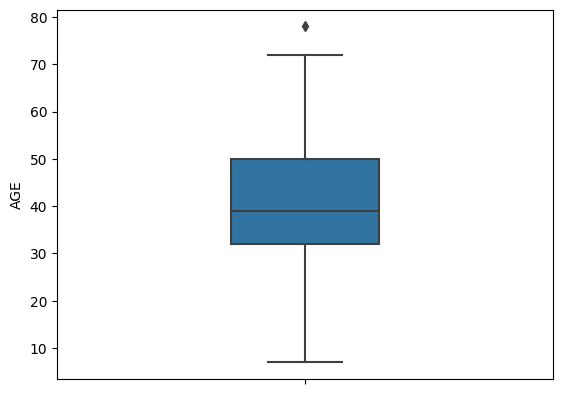

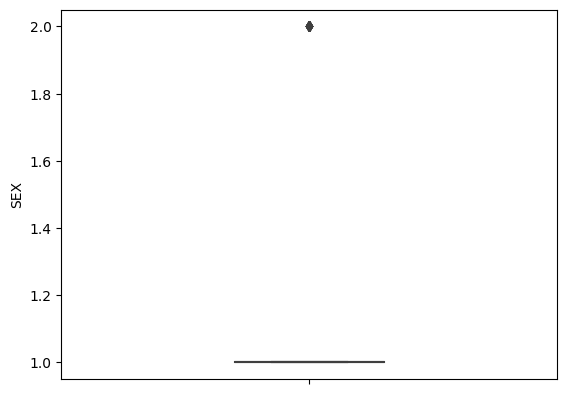

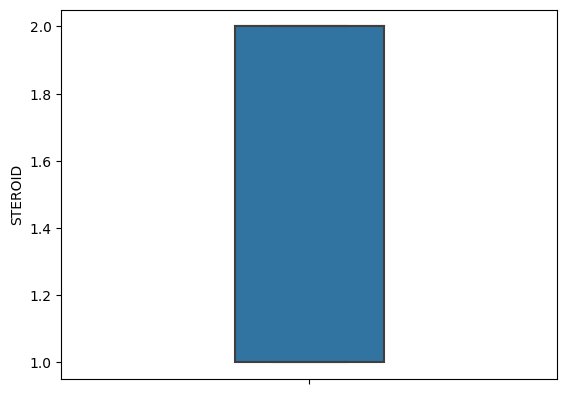

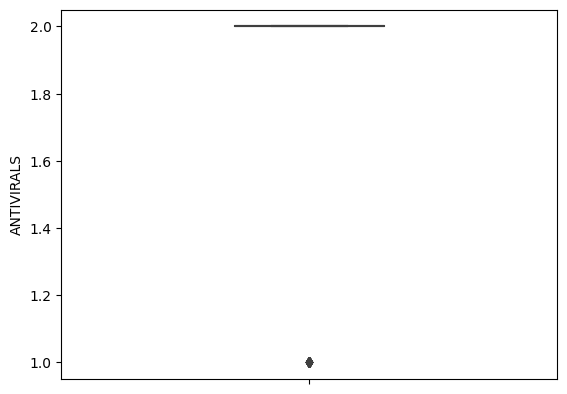

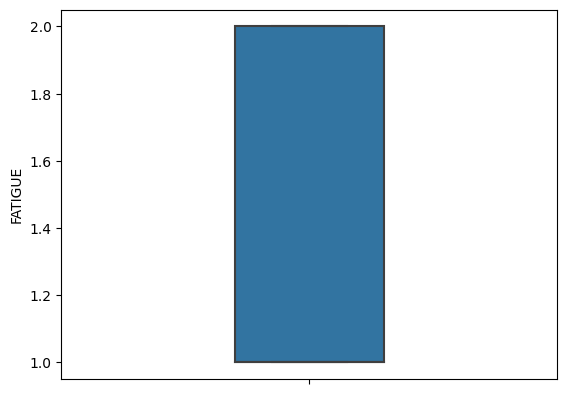

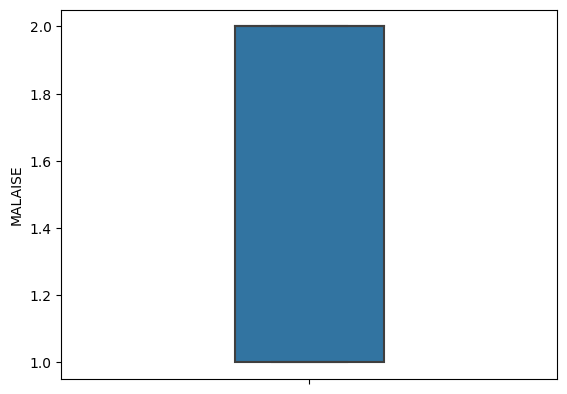

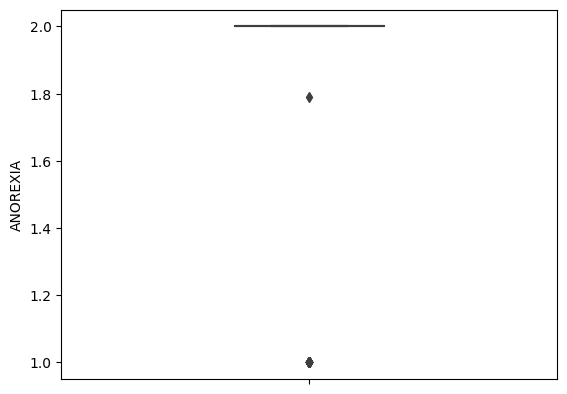

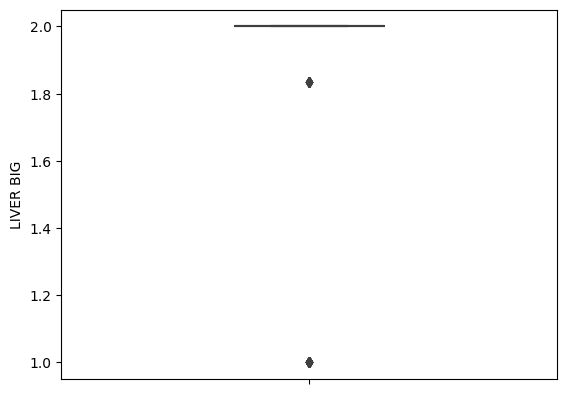

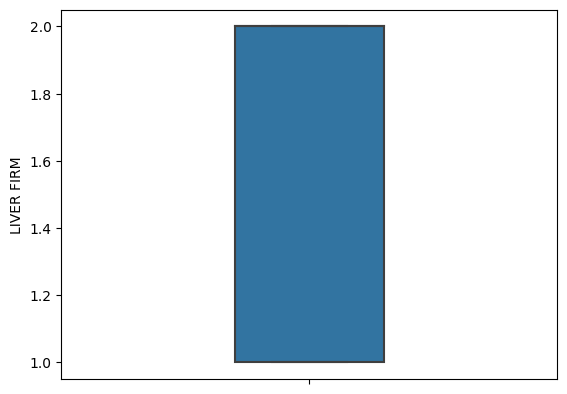

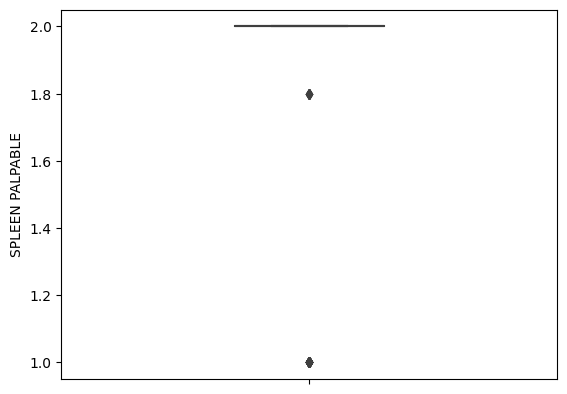

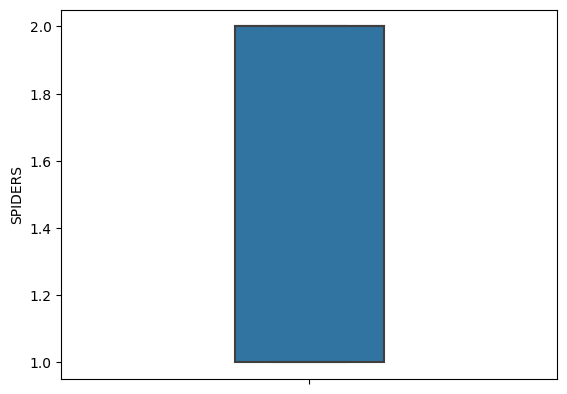

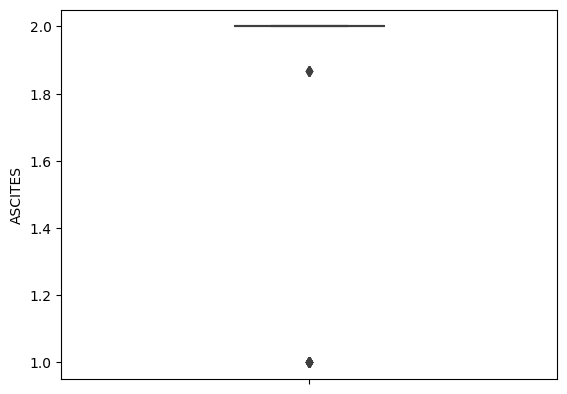

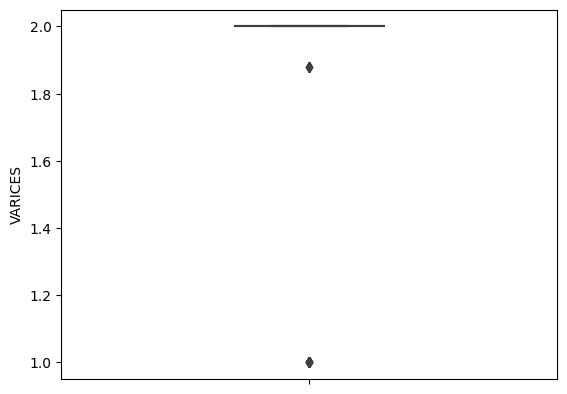

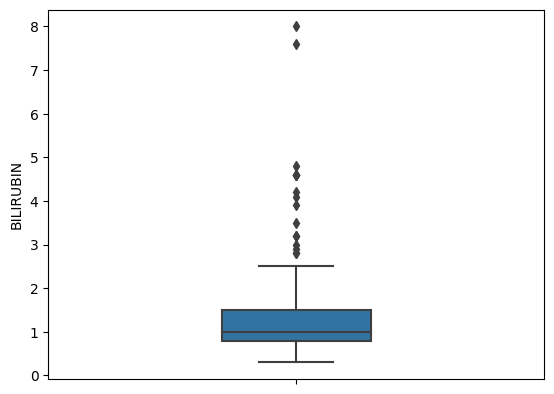

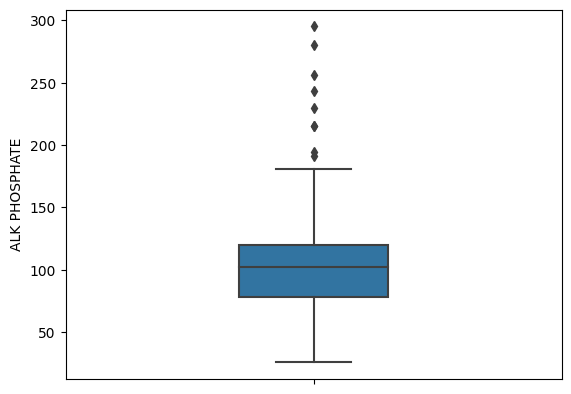

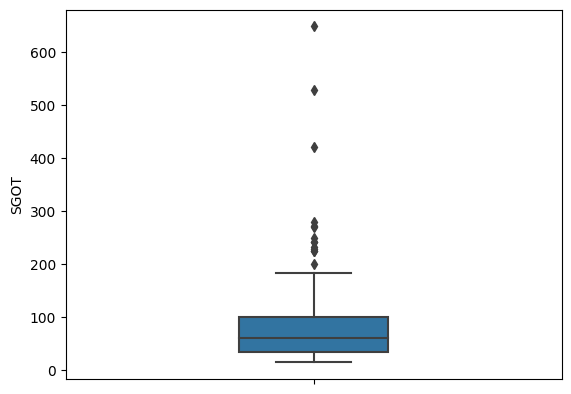

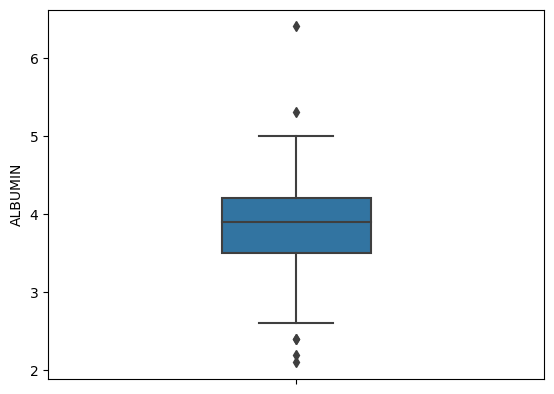

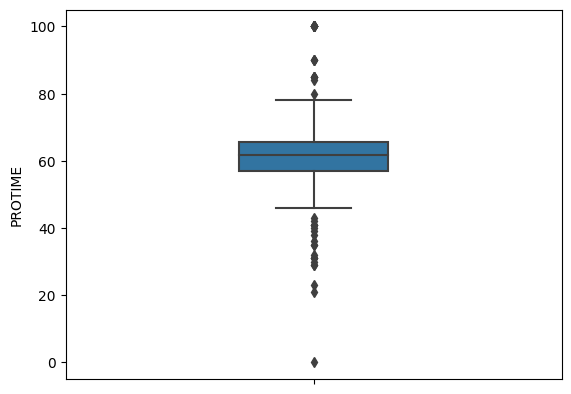

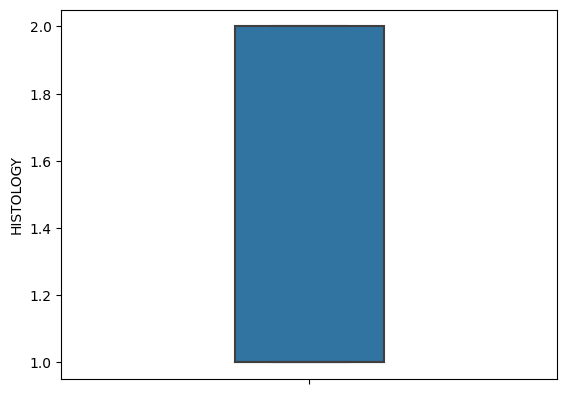

In [14]:
#visualisation of the dataset using box and whisker plots
#Univariate plots to better understand each attribute.
# the distribution of the input attributes
for i in  Hepatitis.columns[1:]:
 sns.boxplot( y=Hepatitis[i],width=0.3 )
 plt.show()

<Axes: >

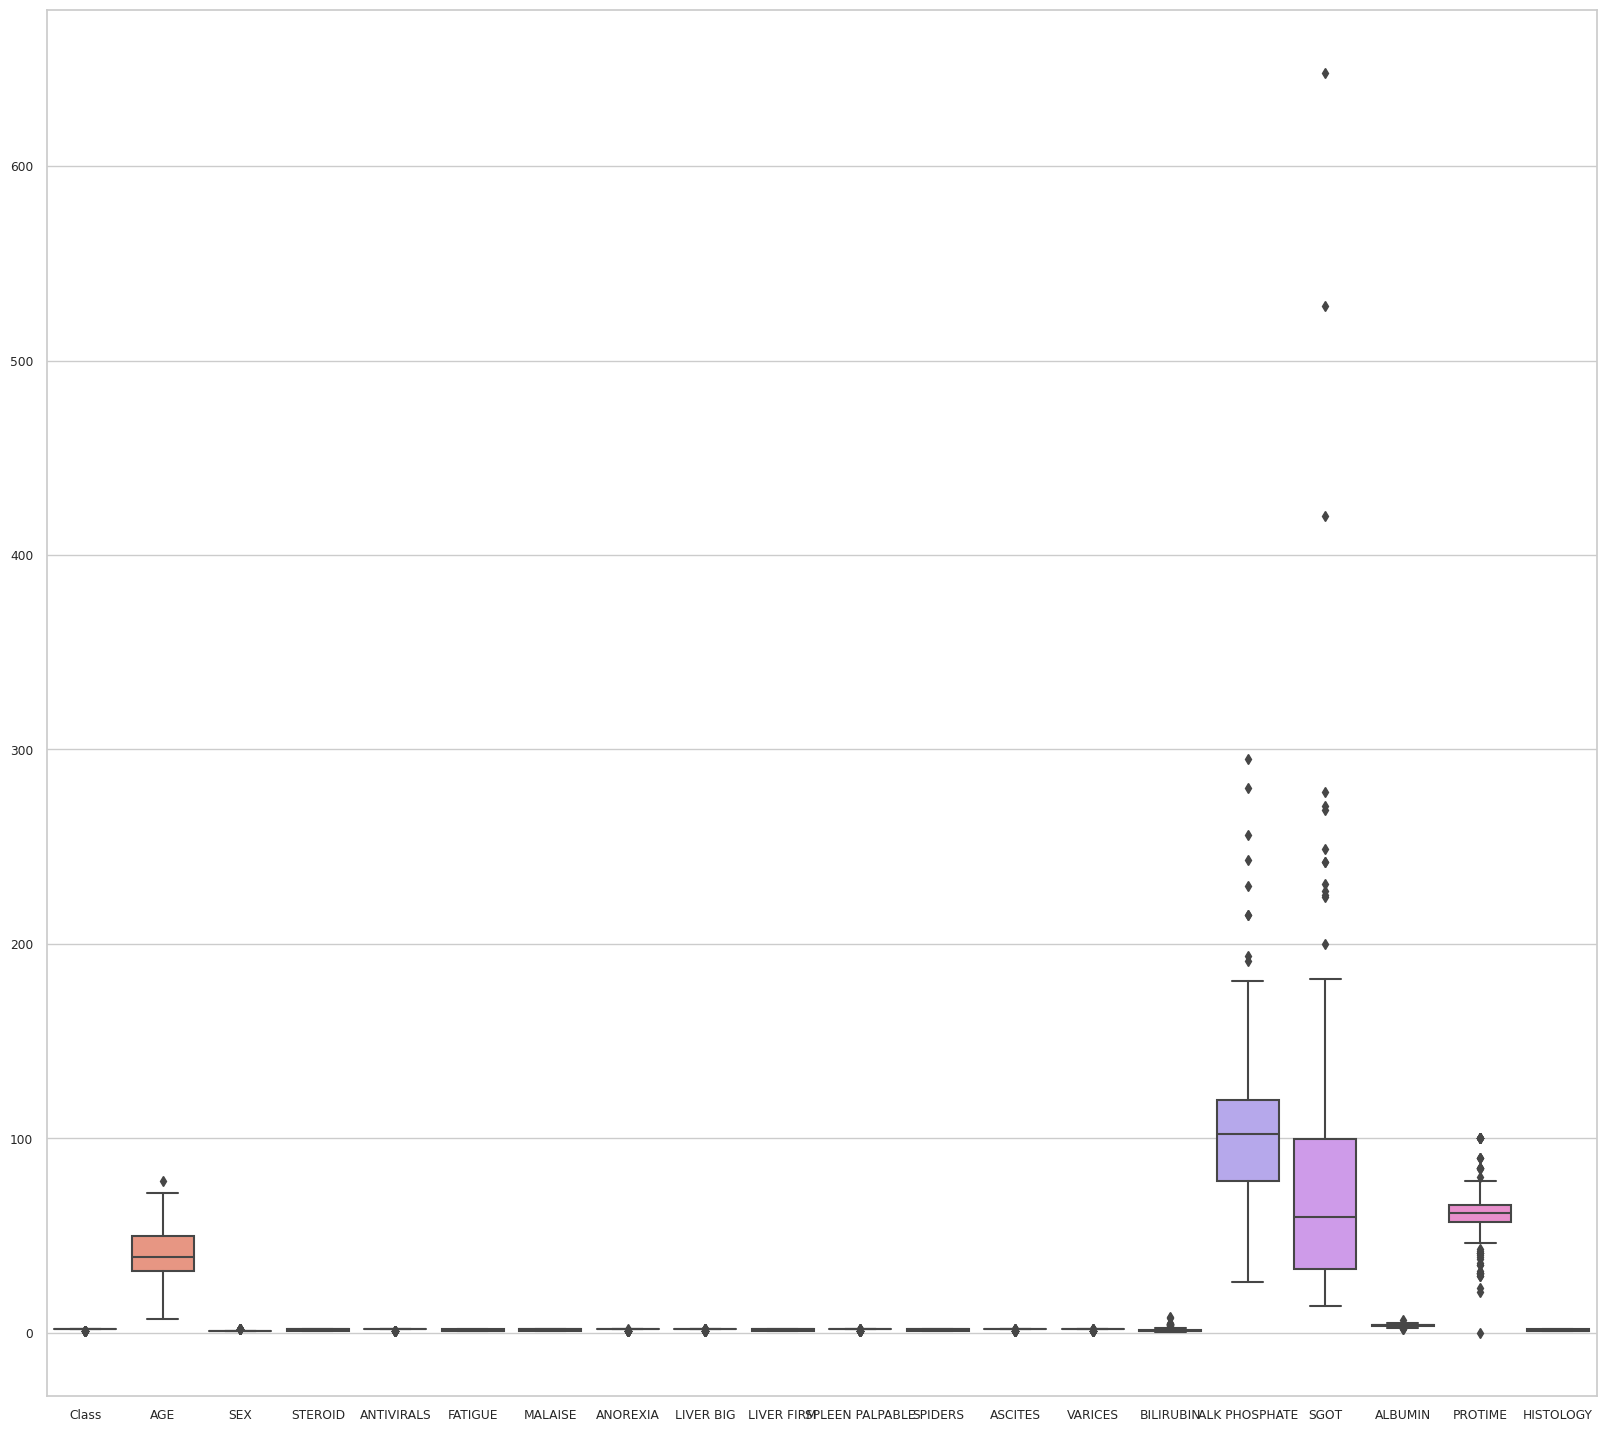

In [15]:
#Multivariate plots to better understand the relationships between attributes.
sns.set(rc={'figure.figsize':(20,18)}, font_scale=0.8, style='whitegrid')
sns.boxplot(data=Hepatitis)

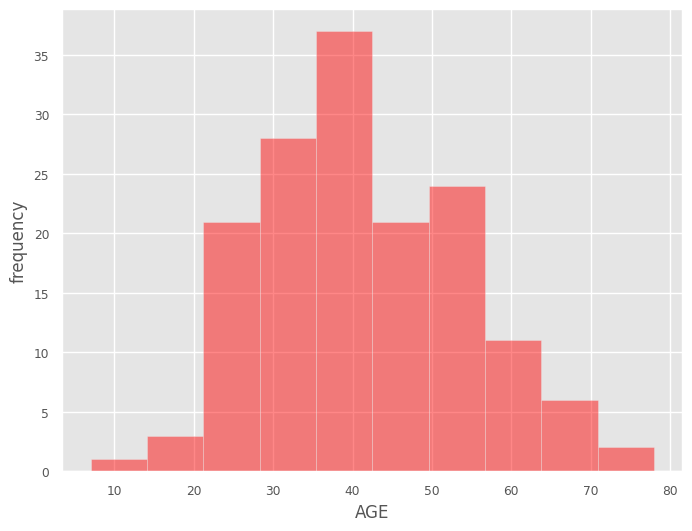

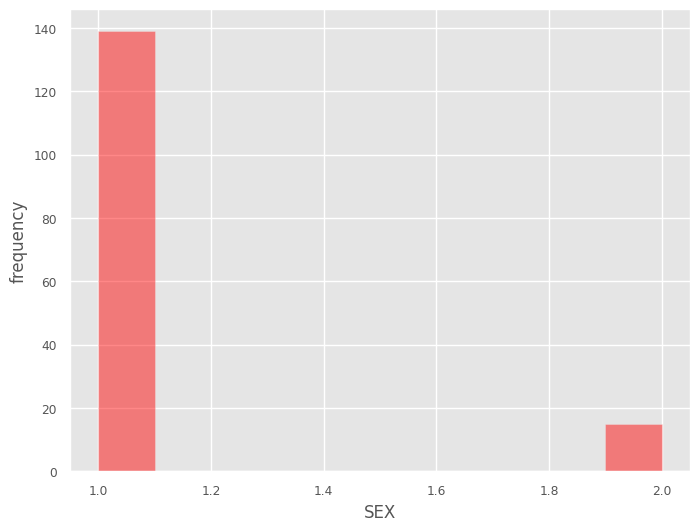

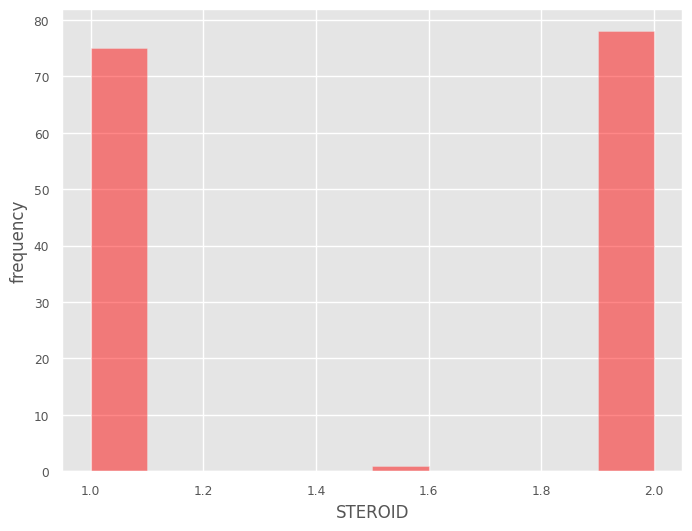

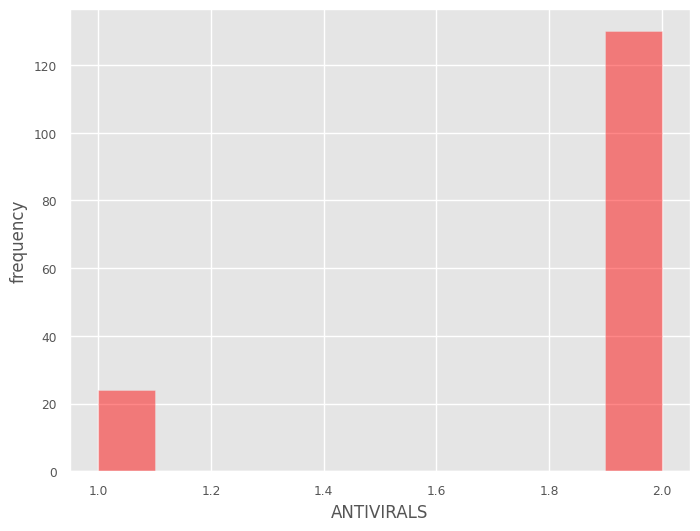

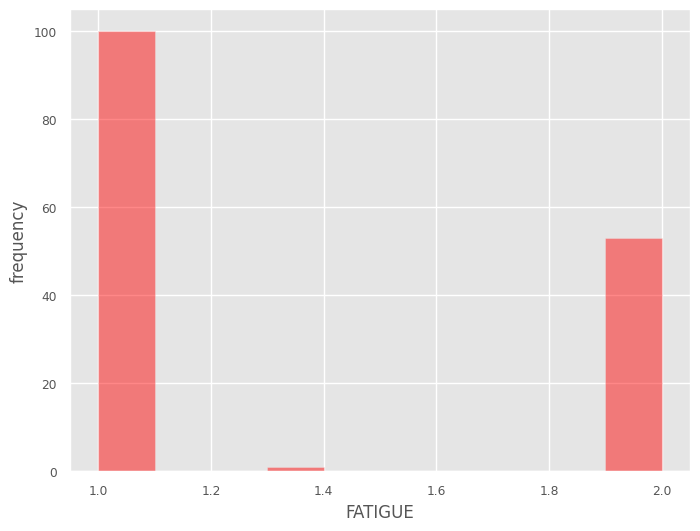

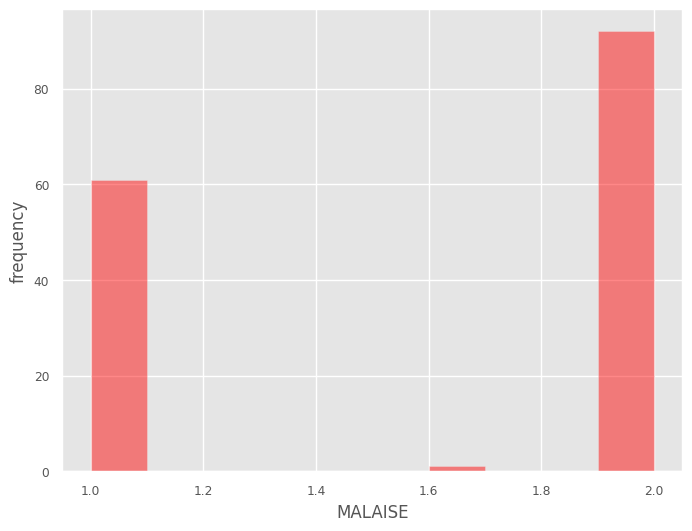

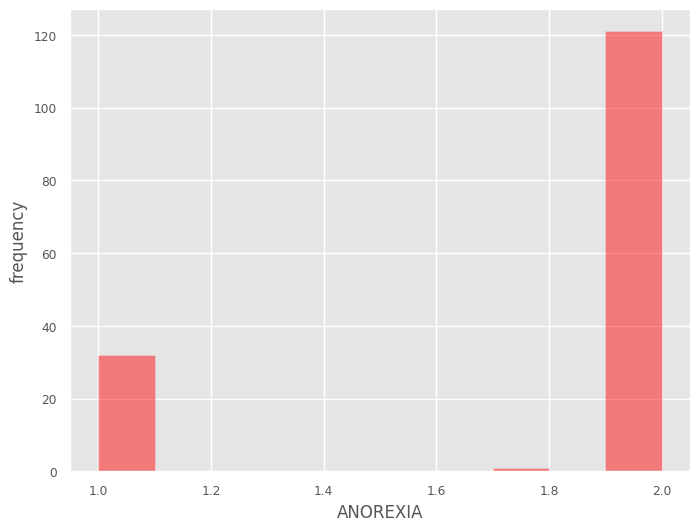

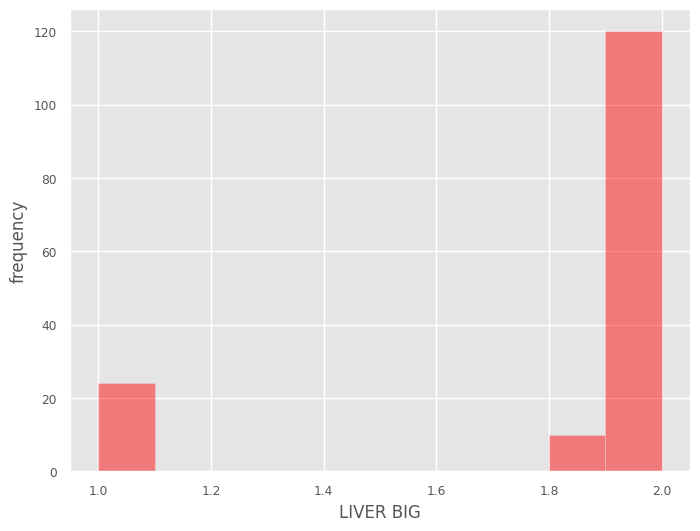

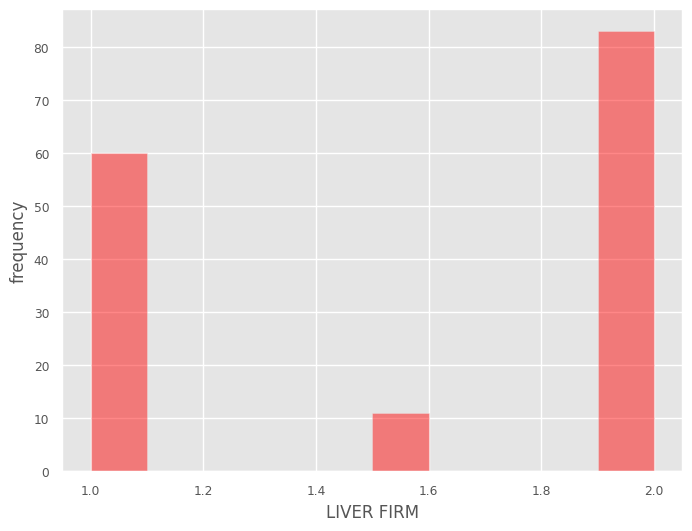

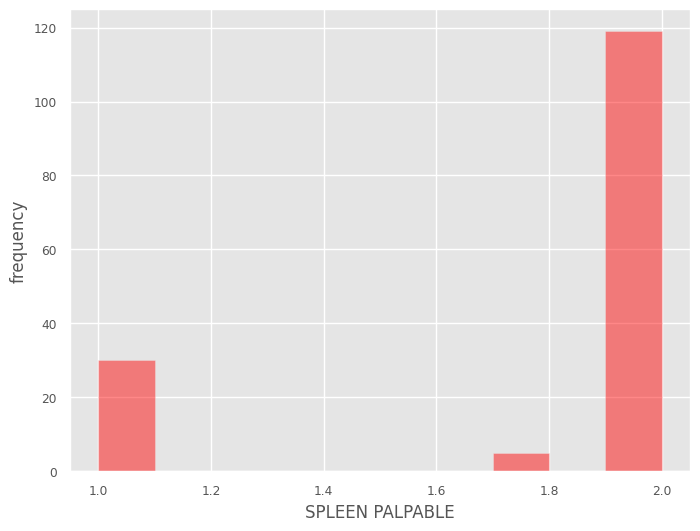

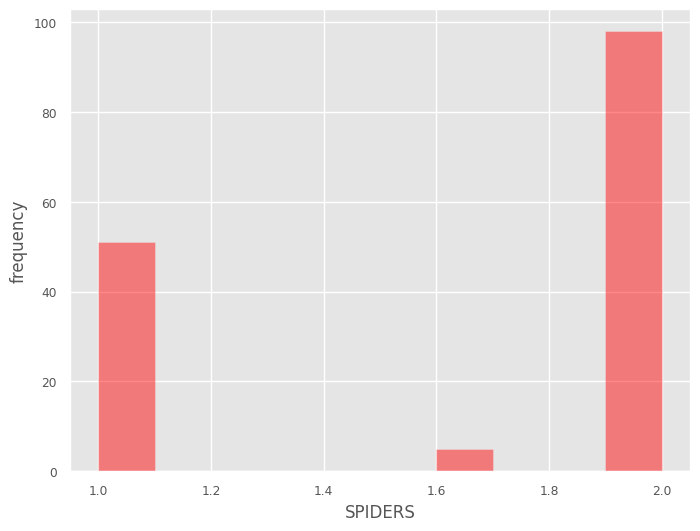

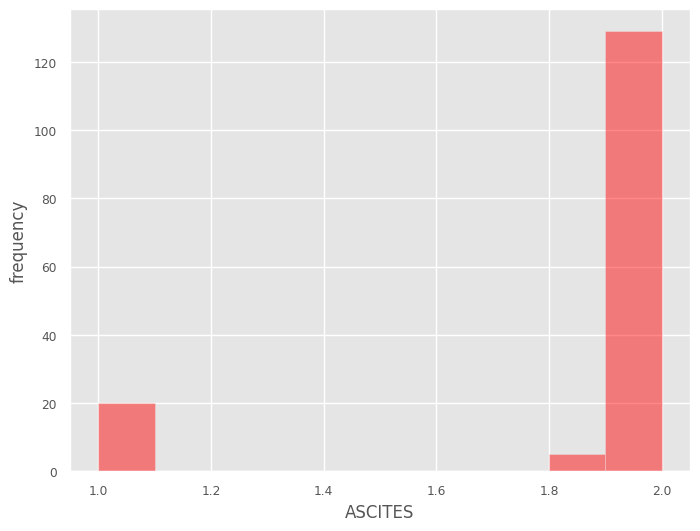

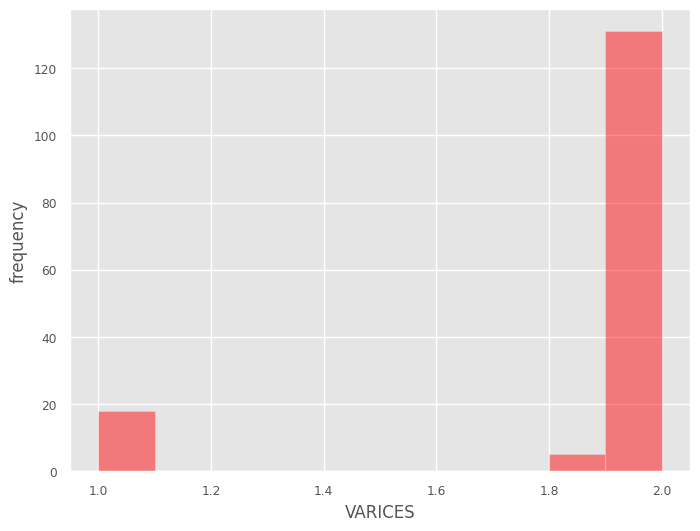

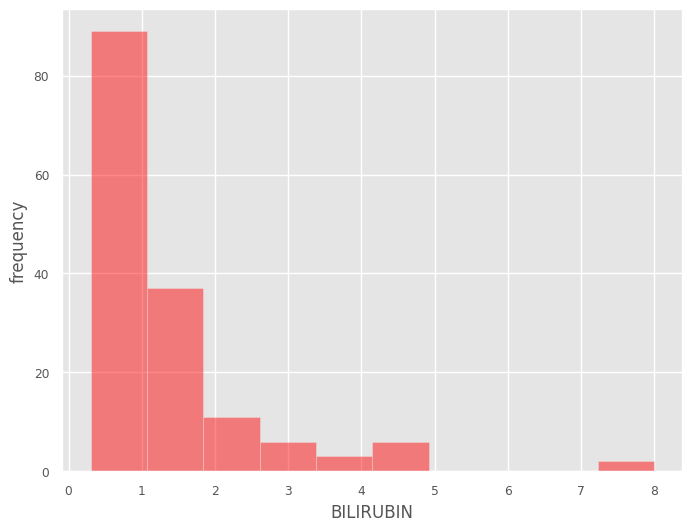

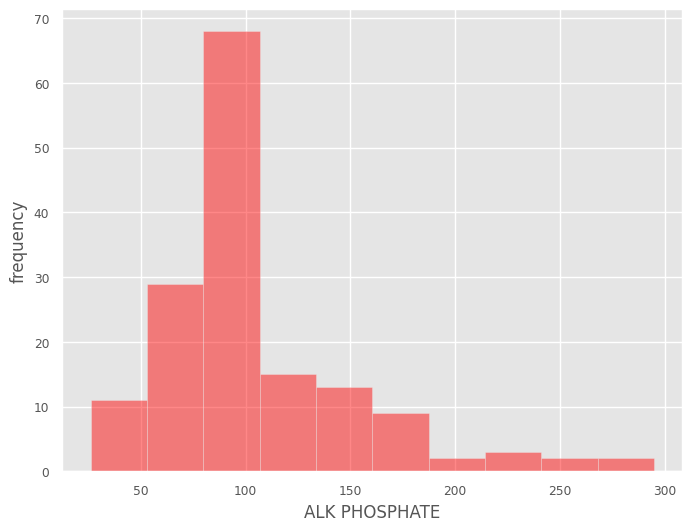

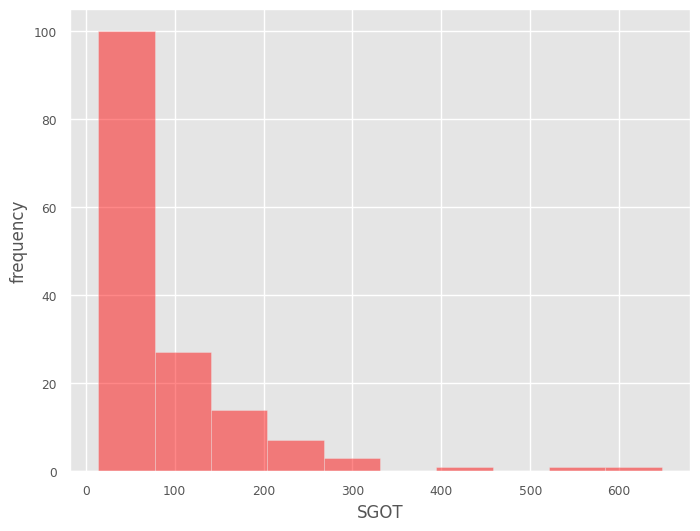

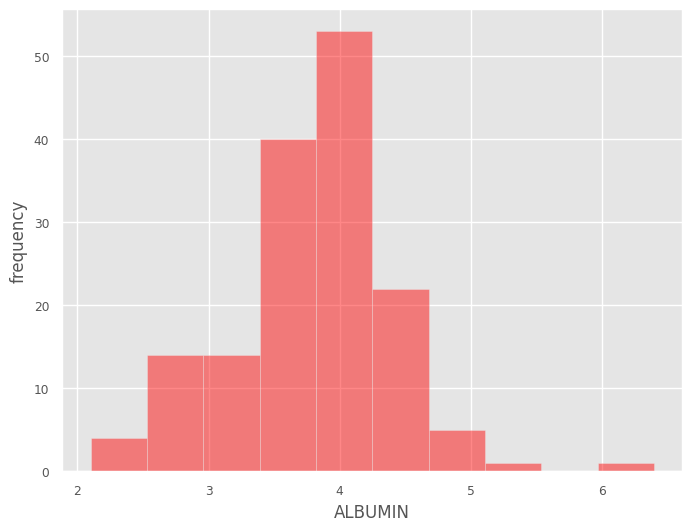

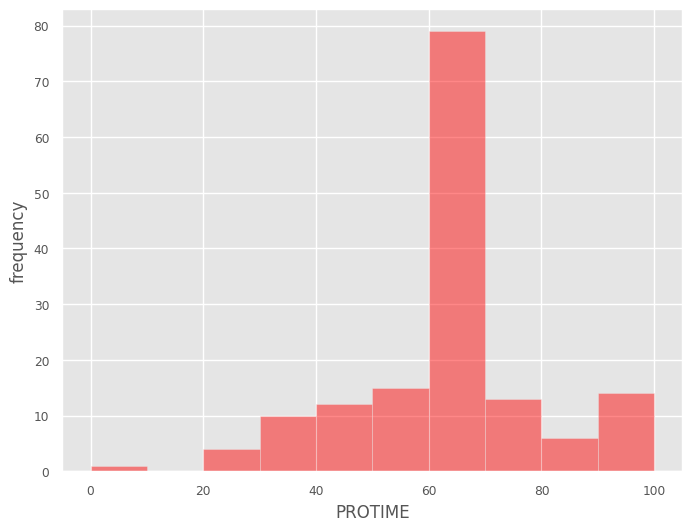

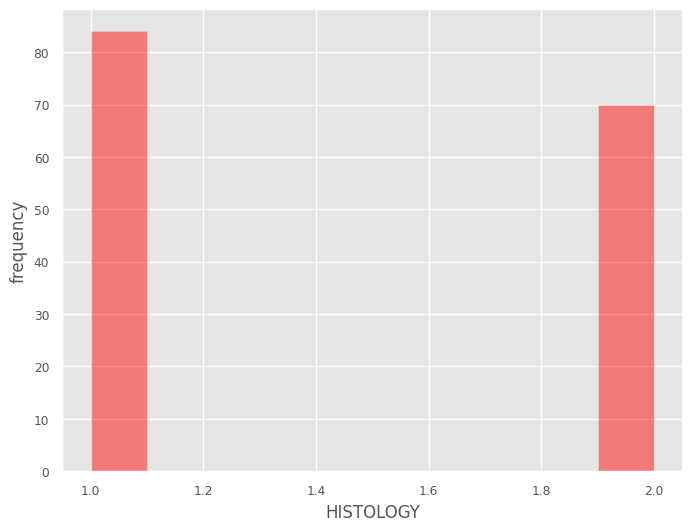

In [16]:
#visualisation of the dataset using histograms
sns.set(rc={'figure.figsize':(8,6)}, font_scale=0.8, style='whitegrid')
style.use('ggplot')
for i in  Hepatitis.columns[1:]:
    plt.figure()
    plt.xlabel(i)
    plt.ylabel('frequency')  
    plt.hist(Hepatitis[i],alpha = 0.47, color = 'red')
    

In [17]:
#Extracting all the features used except the class column
features = list(Hepatitis.columns)[1:]
X=Hepatitis[features]
X

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,50.0,1.0,1.000000,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000,42.0,3.5,61.852273,1.0
1,78.0,1.0,2.000000,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000,32.0,4.0,61.852273,1.0
2,31.0,1.0,1.509804,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000,52.0,4.0,80.000000,1.0
3,34.0,1.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,105.488,200.0,4.0,61.852273,1.0
4,34.0,1.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.000,28.0,4.0,75.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,46.0,1.0,2.000000,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,105.488,242.0,3.3,50.000000,2.0
150,44.0,1.0,2.000000,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.000,142.0,4.3,61.852273,2.0
151,61.0,1.0,1.000000,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.000,20.0,4.1,61.852273,2.0
152,53.0,2.0,1.000000,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.000,19.0,4.1,48.000000,2.0


In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#fit and transform the data
scaled_data =scaler.fit_transform(X)
scaled_data

array([[ 0.69633156, -0.32850216, -1.02313117, ..., -0.51241652,
         0.        , -0.91287093],
       [ 2.93039531, -0.32850216,  0.98377997, ...,  0.29851788,
         0.        , -0.91287093],
       [-0.81964027, -0.32850216,  0.        , ...,  0.29851788,
         1.05549759, -0.91287093],
       ...,
       [ 1.57399946, -0.32850216, -1.02313117, ...,  0.46070477,
         0.        ,  1.09544512],
       [ 0.93569553,  3.04412002, -1.02313117, ...,  0.46070477,
        -0.80566786,  1.09544512],
       [ 0.13781562, -0.32850216,  0.98377997, ..., -1.16116405,
        -1.15463638,  1.09544512]])

In [19]:
X=pd.DataFrame(scaled_data,columns=X.columns)
X

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0.696332,-0.328502,-1.023131,0.429669,-0.730386,0.816932,0.515937,-2.312406,0.882326,0.510451,0.733397,0.400302,0.376849,-0.446545,0.636358,-0.502179,-0.512417,0.000000,-0.912871
1,2.930395,-0.328502,0.983780,0.429669,-0.730386,0.816932,0.515937,0.462481,0.882326,0.510451,0.733397,0.400302,0.376849,-0.614924,-0.204587,-0.615418,0.298518,0.000000,-0.912871
2,-0.819640,-0.328502,0.000000,-2.327373,1.378087,0.816932,0.515937,0.462481,0.882326,0.510451,0.733397,0.400302,0.376849,-0.614924,-1.282720,-0.388940,0.298518,1.055498,-0.912871
3,-0.580276,-0.328502,0.983780,0.429669,1.378087,0.816932,0.515937,0.462481,0.882326,0.510451,0.733397,0.400302,0.376849,-0.362356,0.000000,1.287003,0.298518,0.000000,-0.912871
4,-0.580276,-0.328502,0.983780,0.429669,1.378087,0.816932,0.515937,0.462481,0.882326,0.510451,0.733397,0.400302,0.376849,-0.446545,-0.226149,-0.660714,0.298518,0.764690,-0.912871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.377180,-0.328502,0.983780,0.429669,-0.730386,-1.232093,-1.950888,0.462481,0.882326,0.510451,-1.409273,-2.581946,-2.742626,5.194143,0.000000,1.762609,-0.836790,-0.689345,1.095445
150,0.217604,-0.328502,0.983780,0.429669,-0.730386,0.816932,0.515937,0.462481,-1.220551,0.510451,0.733397,0.400302,0.376849,-0.446545,0.442294,0.630215,0.785079,0.000000,1.095445
151,1.573999,-0.328502,-1.023131,0.429669,-0.730386,-1.232093,0.515937,-2.312406,-1.220551,0.510451,-1.409273,0.400302,0.376849,-0.530734,-0.657403,-0.751306,0.460705,0.000000,1.095445
152,0.935696,3.044120,-1.023131,0.429669,-0.730386,0.816932,0.515937,0.462481,0.882326,-2.024790,-1.409273,0.400302,-2.742626,0.058591,-0.528027,-0.762630,0.460705,-0.805668,1.095445


In [20]:
centroids = None
silhouette_score_list =[]
clustering=[]
Y=[]
rand_index_list=[]
for i in range(0,30):
    kmeans = KMeans(
        max_iter=1,
        n_init=1,
        init=(centroids if centroids is not None else 'random'),
        n_clusters=2,
        random_state=1)
    kmeans.fit(X)
    y_kmeans = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
    
    Y=y_kmeans
    clustering.append(Y) 
    
    #ri=rand_score(Y,kmeans.labels_)
    #rand_index_list.append(ri)
    
    #rn_score = rand_score(Y,kmeans.labels_)
    #rand_index_list.append(rn_score)
    
    #used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other.
    sil_score =silhouette_score(X, kmeans.labels_) 
    silhouette_score_list.append(sil_score)

In [21]:
silhouette_score_list

[0.08332204654542334,
 0.13037111188318182,
 0.14978196014991207,
 0.15916868272616602,
 0.1639068016828444,
 0.17051258751101223,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374,
 0.1752963535468374]

In [22]:
clustering

[array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
       dtype=int32),
 array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1,

In [23]:
rand_index_list=[]
#computes a similarity measure between two clusterings
for index in  range(len(clustering)-1):
    rn_score = rand_score(clustering[index],clustering[index+1])
    rand_index_list.append(rn_score)
rand_index_list

[0.7822765469824293,
 0.9008573126220185,
 0.9367625838214073,
 0.9615482556659027,
 0.9490705373058315,
 0.9741957389016213,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

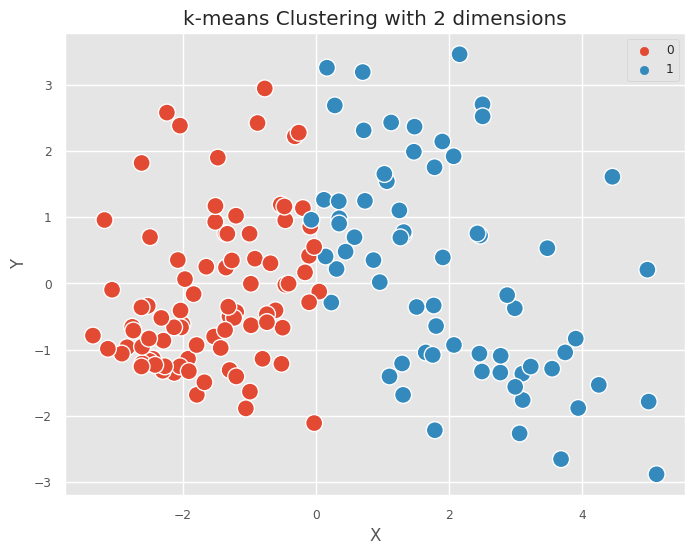

In [24]:
###we are going to run PCA pn the data to reduce the dimensions in pca_components dimensions 
pca_num_components = 2
reduced_data =PCA(n_components = pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['X','Y'])
sns.scatterplot(x="X",y="Y",hue = Y,data = results,s = 150)
plt.title("k-means Clustering with 2 dimensions")
plt.show()

In [25]:
mean_score = sum(silhouette_score_list)/len(silhouette_score_list)
best_score = max(silhouette_score_list)
worst_score = min(silhouette_score_list)
std_score = np.std(silhouette_score_list)
print(mean_score)
print(best_score)
print(worst_score)
print(std_score)

0.16880585585408797
0.1752963535468374
0.08332204654542334
0.018508958212715743


In [26]:
mean_rand = sum(rand_index_list)/len(rand_index_list)
best_rand = max(rand_index_list)
worst_rand = min(rand_index_list)
std_rand = np.std(rand_index_list)
print(mean_rand)
print(best_rand)
print(worst_rand)
print(std_rand)

0.9829210681137659
1.0
0.7822765469824293
0.044532415332866074


In [27]:
# Calling DataFrame constructor on list   
dataset = {'rand_index': [mean_rand,std_rand,worst_rand,best_rand], 'silhouette_score': [mean_score,std_score,worst_score,best_score]}
# Create DataFrame  
df = pd.DataFrame(dataset,index =['Moyenne (mean)', 'Ecart type (std)', 'Minimum (worst)', 'Maximum (best)'])  
df

,rand_index,silhouette_score
Moyenne (mean),0.982921,0.168806
Ecart type (std),0.044532,0.018509
Minimum (worst),0.782277,0.083322
Maximum (best),1.000000,0.175296


In [28]:
df.to_excel(r'C:\Users\dell\Documents\master1\s2\DAMI\MiniProjet\silhouette_rand_Hepatitis.xlsx', index = ['Moyenne (mean)', 'Ecart type (std)', 'Minimum (worst)', 'Maximum (best)'])

In [29]:
#seperate dataset into train and test to avoid overfitting.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30, random_state=1)
# summarize
X_train.shape,X_test.shape
print(f'the number of training features{X_train.shape}')
print(f'the number of testing features{X_test.shape}')

the number of training features(107, 19)
the number of testing features(47, 19)


In [30]:
X_train.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
73,0.696332,-0.328502,0.983780,0.429669,1.378087,0.816932,0.515937,0.462481,0.882326,0.510451,0.733397,0.400302,0.376849,0.058591,-0.118336,0.154610,2.406947,0.000000,-0.912871
18,-0.261124,-0.328502,-1.023131,-2.327373,1.378087,0.816932,0.515937,-2.312406,-1.220551,0.510451,0.733397,0.400302,0.376849,-0.614924,-0.765216,-0.660714,0.622892,0.008592,-0.912871
48,-0.261124,-0.328502,0.983780,-2.327373,-0.730386,-1.232093,-1.950888,0.462481,0.882326,0.510451,-1.409273,0.400302,0.376849,-0.614924,0.420731,-0.241728,0.622892,0.881013,-0.912871
4,-0.580276,-0.328502,0.983780,0.429669,1.378087,0.816932,0.515937,0.462481,0.882326,0.510451,0.733397,0.400302,0.376849,-0.446545,-0.226149,-0.660714,0.298518,0.764690,-0.912871
45,-0.340912,-0.328502,-1.023131,0.429669,1.378087,0.816932,0.515937,0.462481,-1.220551,0.510451,-1.409273,0.400302,0.376849,-0.699113,-0.549589,-0.071869,-0.025856,0.000000,-0.912871


In [31]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_train, Y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)
#what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
#(larger is better)
#Running this section prints out the scores calculated for each input feature and the target variable.

Feature 0: 2.971830
Feature 1: 2.452682
Feature 2: 1.899621
Feature 3: 9.065236
Feature 4: 51.539787
Feature 5: 55.776559
Feature 6: 31.614347
Feature 7: 9.130146
Feature 8: 27.122411
Feature 9: 14.659318
Feature 10: 68.889951
Feature 11: 22.997050
Feature 12: 22.920863
Feature 13: 41.199696
Feature 14: 15.687760
Feature 15: 8.155135
Feature 16: 39.891892
Feature 17: 12.651455
Feature 18: 23.110739


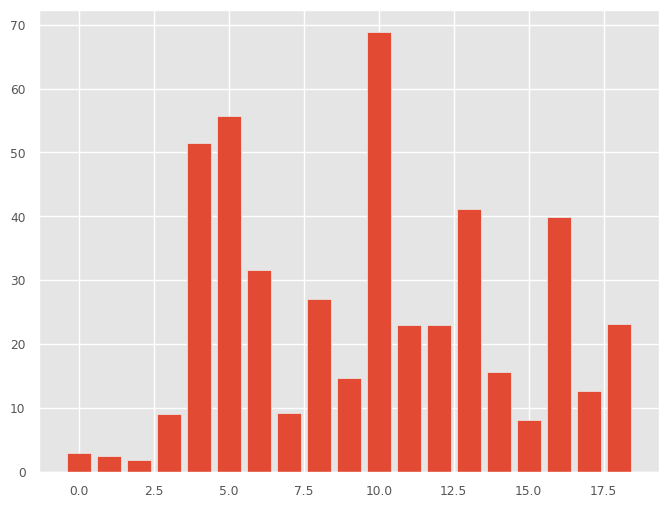

In [32]:
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [33]:
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1]-1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, Y)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.957
Best Config: {'anova__k': 18}


In [34]:
selector = SelectKBest(f_classif, k=18)
selector.fit(X_train, Y_train)

SelectKBest(k=18)

In [35]:
#Top Features
cols = selector.get_support(indices=True)
cols

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [36]:
x_train_s = X_train.iloc[:,cols]
x_test_s = X_test.iloc[:,cols]

In [37]:
print(f'the number of training features{x_train_s.shape}')
print(f'the number of testing features{x_test_s.shape}')

the number of training features(107, 18)
the number of testing features(47, 18)


In [38]:
kfold=KFold(n_splits=5, random_state=None, shuffle=False)
accuracy_scores=[]
precision_scores=[]
recall_scores=[]
f1_scores=[]
names = ['KNN','Arbre de décision','Bayes','SVM']

In [39]:
# Spot Check Algorithms
models = []
dictt=dict()
models.append(('KNN', KNeighborsClassifier()))
models.append(('Arbre de décision', DecisionTreeClassifier()))
models.append(('Bayes', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = list()
names = list()

In [40]:
#accuracy
for name, model in models:
    kfold = RepeatedKFold(n_splits=5, random_state=2652124,n_repeats=30)
    
    cv_results = cross_val_score(model, x_train_s,Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    dictt[name]=[cv_results.mean(),cv_results.std(),min(cv_results),max(cv_results)]      
df = pd.DataFrame(dictt,index =['Moyenne (mean)', 'Ecart type (std)', 'Minimum (worst)', 'Maximum (best)'])  
df

,KNN,Arbre de décision,Bayes,SVM
Moyenne (mean),0.888297,0.814589,0.907056,0.933074
Ecart type (std),0.068608,0.084824,0.073712,0.046808
Minimum (worst),0.681818,0.571429,0.636364,0.809524
Maximum (best),1.000000,1.000000,1.000000,1.000000


In [41]:
df.to_excel(r'C:\Users\dell\Documents\master1\s2\DAMI\MiniProjet\accuracy_score_Hepatitis.xlsx', index = ['Moyenne (mean)', 'Ecart type (std)', 'Minimum (worst)', 'Maximum (best)'])

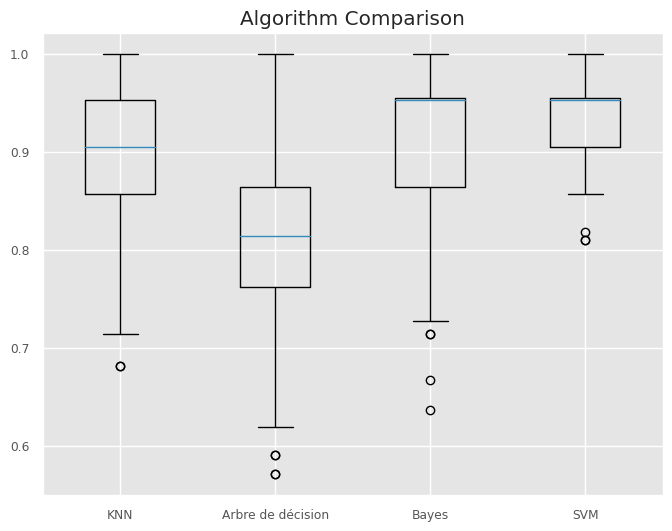

In [42]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [43]:
#precision
results.clear()
names.clear()
for name, model in models:
    kfold = RepeatedKFold(n_splits=5, random_state=2652124,n_repeats=30)
    cv_results = cross_val_score(model, x_train_s,Y_train, cv=kfold,  scoring='precision')
    results.append(cv_results)
    names.append(name)
    dictt[name]=[cv_results.mean(),cv_results.std(),min(cv_results),max(cv_results)]      
df = pd.DataFrame(dictt,index =['Moyenne (mean)', 'Ecart type (std)', 'Minimum (worst)', 'Maximum (best)'])  
df

,KNN,Arbre de décision,Bayes,SVM
Moyenne (mean),0.963272,0.794405,0.923680,0.944415
Ecart type (std),0.067853,0.137346,0.090285,0.085989
Minimum (worst),0.666667,0.400000,0.571429,0.600000
Maximum (best),1.000000,1.000000,1.000000,1.000000


In [44]:
df.to_excel(r'C:\Users\dell\Documents\master1\s2\DAMI\MiniProjet\precisions_score_Hepatitis.xlsx', index = ['Moyenne (mean)', 'Ecart type (std)', 'Minimum (worst)', 'Maximum (best)'])

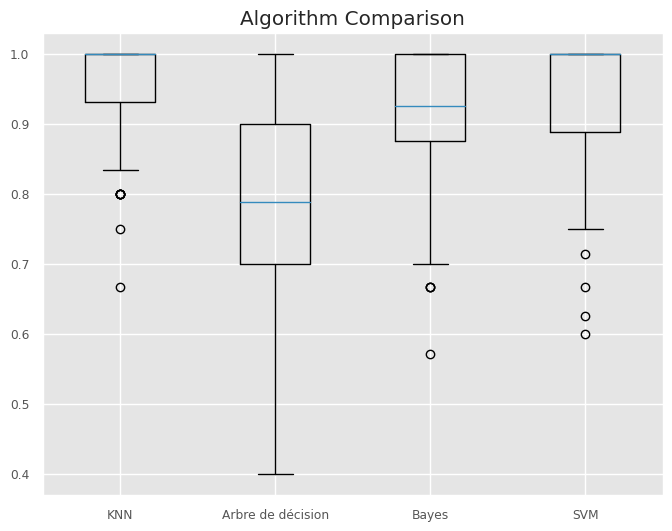

In [45]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [ ]:
#recall
results.clear()
names.clear()
for name, model in models:
    kfold = RepeatedKFold(n_splits=5, random_state=2652124,n_repeats=30)
    cv_results = cross_val_score(model, x_train_s,Y_train, cv=kfold,  scoring='recall')
    results.append(cv_results)
    names.append(name)
    dictt[name]=[cv_results.mean(),cv_results.std(),min(cv_results),max(cv_results)]      
df = pd.DataFrame(dictt,index =['Moyenne (mean)', 'Ecart type (std)', 'Minimum (worst)', 'Maximum (best)'])  
df

In [ ]:
df.to_excel(r'C:\Users\dell\Documents\master1\s2\DAMI\MiniProjet\recall_Hepatitis.xlsx', index = ['Moyenne (mean)', 'Ecart type (std)', 'Minimum (worst)', 'Maximum (best)'])

In [ ]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [ ]:
#F1 score
results.clear()
names.clear()
for name, model in models:
    kfold = RepeatedKFold(n_splits=5, random_state=2652124,n_repeats=30)
    cv_results = cross_val_score(model, x_train_s,Y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    dictt[name]=[cv_results.mean(),cv_results.std(),min(cv_results),max(cv_results)]     
df = pd.DataFrame(dictt,index =['Moyenne (mean)', 'Ecart type (std)', 'Minimum (worst)', 'Maximum (best)'])  
df

,KNN,Arbre de décision,Bayes,SVM
Moyenne (mean),0.846395,0.781896,0.875669,0.913768
Ecart type (std),0.096249,0.098034,0.108391,0.069136
Minimum (worst),0.533333,0.500000,0.428571,0.600000
Maximum (best),1.000000,1.000000,1.000000,1.000000


In [ ]:
df.to_excel(r'C:\Users\dell\Documents\master1\s2\DAMI\MiniProjet\f1_score_Hepatitis.xlsx', index = ['Moyenne (mean)', 'Ecart type (std)', 'Minimum (worst)', 'Maximum (best)'])

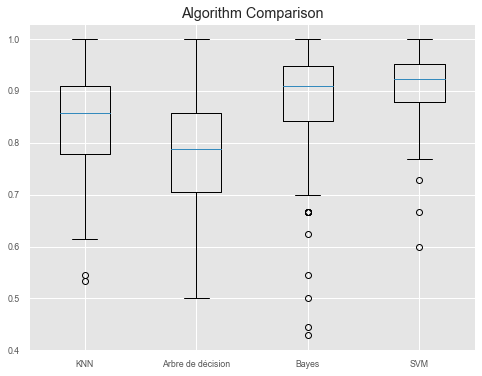

In [ ]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [ ]:
# Make predictions on validation dataset
#from the results SVM seems the most accurate model
#Now we want to get an idea of the accuracy of the model on our validation set.
model = SVC(gamma='auto')
model.fit(x_train_s, Y_train)
predictions = model.predict(x_test_s)
print(accuracy_score(Y_test, predictions))

0.9574468085106383
